# Project Name: Amazon Product Reviews Sentiment Analysis


### Goal: To analyze the sentiment behind reviews written on any Product hosted on Amazon

**Dataset**: GeeksforGeeks Amazon Review Dataset (https://drive.google.com/file/d/1yXhMGfaElSHpjz5CXa9UxAtV7A7i14hl/view)

**About the Project**: With the vast number of products available on Amazon, customers often rely on reviews to make informed purchasing decisions. However, the sheer volume of reviews can be overwhelming, making it challenging for customers to gauge the overall sentiment quickly. Additionally, sellers and product developers can benefit from understanding the general sentiment and specific feedback about their products to improve their offerings and address any issues.<br>

To address this, we design a Machine Learning Model that analyzes the sentiment behind reviews written on any product hosted on Amazon. By training the model on a comprehensive dataset of reviews and their corresponding sentiments, it can accurately classify new reviews as positive, negative, or neutral. This tool will assist customers in quickly understanding the overall sentiment of a product, and it will provide sellers with valuable insights into customer satisfaction and areas for improvement. The ultimate goal is to enhance the shopping experience for customers and help sellers maintain high standards for their products.

### Section 1: Data Collection

We need to first import the necessary libraries, after which we will read the above mentioned dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
data = pd.read_csv(r"C:\Users\goura\Desktop\Data Science\Datasets\AmazonReview.csv")
data

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1
...,...,...
24995,These cables (lightning) are far superior to m...,5
24996,This unit performs exactly as advertised. I u...,5
24997,I had the key cut at a local hardware store cu...,5
24998,I love my case I ordered from amazon. It wasn'...,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


### Section 2: Data Cleaning/Manipulation

Let's first deal with the null values first.

In [5]:
data.dropna(axis=0,inplace=True)

In [6]:
data['Sentiment'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

We can see 5 different ratings for 'Sentiment'.<br>
The higher the number, the more positive the sentiment. We can convert these values to binary to later use binary classification for determining the sentiment.<br>
Lets specify positive sentiments to be 1, and negative ones to be 0.

In [7]:
data['Sentiment'] = (data['Sentiment']>3).astype(int)

Our next step comprises of removing the stop words to provide the model with more relevant information.<br>

What are stop words?<br>
Stop words are common words/letters used in a sentence which doesn't contribute much to the meaning of the sentence in context of text analysis.<br>
Ex: Articles,Prepositions,Conjunctions,Pronouns.<br>
such as,<br>

* My Iphone was broken
* The Iphone was broken<br>

Stop words: my, the, was.<br>
Even without these words, the broad message of "Iphone, broken" is still clear.

In [8]:
stop_words = stopwords.words('english')
def clean_review(review):
    clean_review = " ".join(word for word in review.split() if word not in stop_words)
    return clean_review

In [9]:
data['Review'] = data['Review'].apply(clean_review)

In [10]:
data['Review'][1]

'This case takes long ship even worth DONT BUY!!!!'

We have thus encapsulated the key words behind each review for our dataset.

Lets have a deeper look at our review's sentiments by visualizing the most frequently used words in either case.

In [11]:
data['Sentiment'].value_counts()

Sentiment
0    15000
1     9999
Name: count, dtype: int64

We will be using WordCloud for the visualization purpose.<br>
A **Word Cloud** is a visual representation of the most frequently occurring words in a text dataset. Words that appear more frequently are displayed in larger fonts, while less frequent words are shown in smaller fonts.<br>

Visualizing a word cloud can help us quickly grasp the general tone of reviews.

Lets start of with the negative reviews.

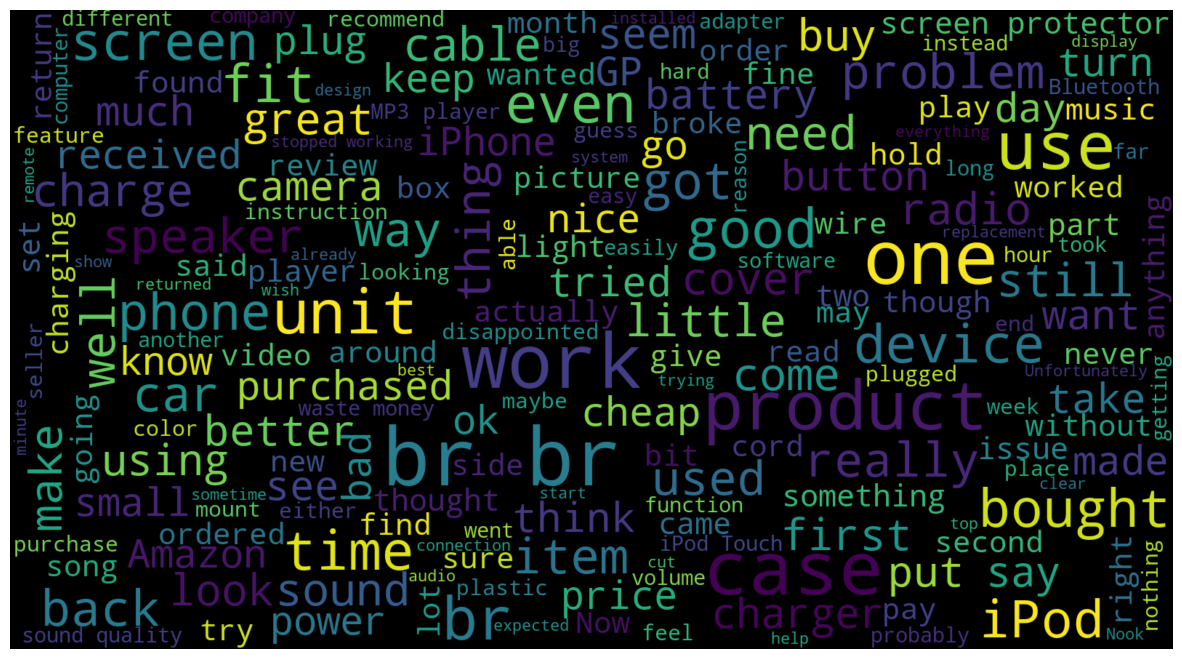

In [12]:
consolidated = ' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
WC = WordCloud(width = 1600, height = 880, random_state = 21, max_font_size = 110)
plt.figure(figsize=(15,10))
plt.imshow(WC.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

The visualization for the negative reviews is as shown above.<br>
Lets have one for the postive reviews too.

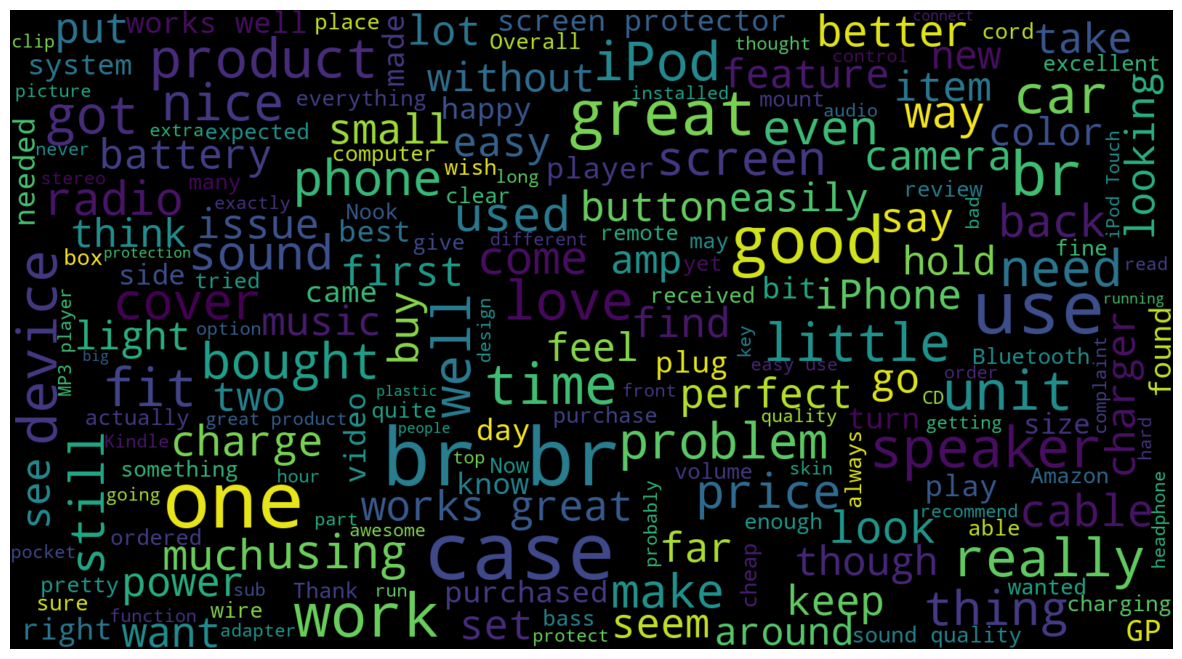

In [13]:
consolidated = " ".join(word for word in data['Review'][data['Sentiment']==1].astype(str))
WC = WordCloud(width = 1600, height = 880, random_state = 21, max_font_size = 110)
plt.figure(figsize=(15,10))
plt.imshow(WC.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

Now, since our data is majorly textual data, we will need to convert this into numerical data to fit into a model.<br>
But will encoding be the best choice? No.<br>
We will use TfidVectorizer instead.<br>

The **TfidfVectorizer** is a tool used to convert a collection of text documents into a matrix of TF-IDF features.<br>
TF-IDF : **Term Frequency - Inverse Document Frequency**.<br>
This is a numerical representation of a document's content that reflects how important a word is to a document in a collection or corpus<br>

It is much like encoding object-type data to numerical data, but in this case the numeric data used is an indicator to the relevance of a word in the data, rather than a randomly assigned number.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(max_features=2500)
X = tfid.fit_transform(data['Review']).toarray()

In [15]:
len(X[0])

2500

Now that our data has been converted to a numeric format, lets create the train and test subsets.

In [16]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

With this, our data manipulation and exploration is done.<br>
Lets move on to creating a model to help us with the sentiment determining task.

### Section 3: Model Selection

Since our problem demands us to determine if a review is positive or negative, we will use **binary classification**.<br>
For this, we can use many classification models like 
* Logistic Regression
* K Nearest Neighbours
* Naive Bayes
* Support Vector Machines
* RandomForest
* DesicionTree

Lets try out a few, starting with Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
accuracy_score(y_test,lr_pred)*100

81.632

We get 81.6% accuracy, could be better. Lets try KNN.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(x_train,y_train)
knn_pred = knn_model.predict(x_test)

In [20]:
accuracy_score(y_test,knn_pred)*100

44.576

KNN doesn't perform much good, so we discard it's idea and try another.

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=18) 
dt_model.fit(x_train, y_train) 
dt_preds = dt_model.predict(x_test) 

In [22]:
accuracy_score(y_test,dt_preds)*100

67.264

This too, has a moderate accuracy. We will try one final model, that being Naive Bayes.

In [23]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train,y_train)
nb_preds = nb_model.predict(x_test)

In [24]:
accuracy_score(y_test,nb_preds)*100

78.944

As we can see, the accuracy for this model too is **~79%**.

Due to the size of the dataset, its **unfavourable to use time-consuming models like RandomForestClassifier or SVM**.<br>
So, we will use the 2 most accurate among  discussed models to finalize our predictions.<br>

Lets create weights for each of the prediction based on their accuracy.

In [25]:
lrw = 0.816
nbw = 0.786
dtw = 0.676

In [26]:
final_preds = [ round((i*lrw + j*nbw + k*dtw)/(lrw+nbw+dtw)) for i,j,k in zip(lr_pred,dt_preds,nb_preds) ]

In [27]:
accuracy_score(y_test,final_preds)*100

80.4

So, we find a maximum accuracy of **80.4%**.
Thus, we can consider this to be the maximum possible accuracy by our defined models.<br>

Combining these 3 predictions can help because, when one of the models give a wrong prediction, the other two can rectify it.

Lets visualize our ptedictions.

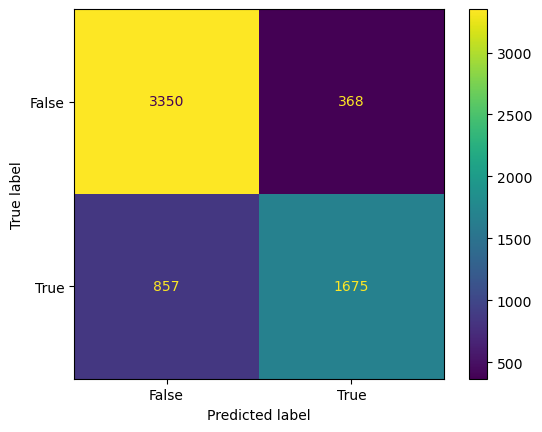

In [28]:
cm = confusion_matrix(y_test,final_preds)
 
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()

Thus, we finalize these to be our models. Lets proceed to make this project user-interactive.

### Section 4: User-Interactive Space

First of all, we will fit our models with the entire data, to improve performance.

In [29]:
lr_model.fit(X,data['Sentiment'])
nb_model.fit(X,data['Sentiment'])
dt_model.fit(X,data['Sentiment'])

DecisionTreeClassifier(random_state=18)

Now, lets create a code block to accept our input and provide its predictions as output.

In [34]:
c=0
while True:
    if c==0:
        print("Do you want to make any sentiment predictions?")
    elif c>0:
        print("Do you want to make any more predictions?")
    print("Enter 1 if Yes, else 0")
    a = int(input("Choice:"))
    if a!=0 and a!=1:
        print("Invalid Choice")
    elif a==0:
        print("Choice is No (0)")
        print("Exit Program")
        if c>0:
            print("Thank you for using our services.")
        break
    elif a==1:
        print("Choice is Yes (1)")
        print("Enter Your Review")
        review = input()
        clean_review = " ".join(word for word in review.split() if word not in stop_words)
        df = pd.DataFrame([clean_review], columns=['Review'])
        R = tfid.transform(df['Review']).toarray()
        lr_pred = lr_model.predict(R)
        nb_pred = nb_model.predict(R)
        dt_pred = dt_model.predict(R)
        final_preds = [ round((i*lrw + j*nbw + k*dtw)/(lrw+nbw+dtw)) for i,j,k in zip(lr_pred,dt_preds,nb_preds) ]
        print("Reported Review: ",review)
        print("The Sentiment is predicted to be:",["Positive" if final_preds[0]==1 else "Negative"][0])
        c+=1
    

Do you want to make any sentiment predictions?
Enter 1 if Yes, else 0


Choice: 1


Choice is Yes (1)
Enter Your Review


 This product has its own faults, but its a great experience overall


Reported Review:  This product has its own faults, but its a great experience overall
The Sentiment is predicted to be: Positive
Do you want to make any more predictions?
Enter 1 if Yes, else 0


Choice: 1


Choice is Yes (1)
Enter Your Review


 Not worth the money. Too many unnecessary features to be a user friendly product.


Reported Review:  Not worth the money. Too many unnecessary features to be a user friendly product.
The Sentiment is predicted to be: Negative
Do you want to make any more predictions?
Enter 1 if Yes, else 0


Choice: 0


Choice is No (0)
Exit Program
Thank you for using our services.


As we can see, the program understands the sentiment behind our comments.<br>
With this, our program is ready to use and the project is complete.

### Conclusion

In this project, we aimed to analyze the sentiment behind product reviews on Amazon using the **Multinomial Naive Bayes algorithm** and the **Logistic Regression algorhithm**. By leveraging text data from the reviews and transforming it into **TF-IDF features**, we built a model to classify sentiments as positive or negative.

Our model achieved an accuracy of **approximately 81%** on the test set, demonstrating its effectiveness in understanding and predicting sentiment from review text. This level of accuracy indicates that the model can reliably categorize sentiment and provide useful insights into customer opinions.

With its strong performance on the given dataset, we anticipate that the model will also perform well on similar, unseen datasets. This suggests that our approach can be a valuable tool for sentiment analysis in real-world applications, aiding businesses and researchers in understanding customer feedback more effectively.